In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import struct

N=944 # размер матрицы данных в файле grd
R = np.zeros ((N, N)) # матрица для прочитанных данных

def ReadFile(fname):
    try:
        f=open(fname, "rb")
        C=f.read(4).decode("utf-8")
        N_x=int.from_bytes(f.read(2), "little") # кол-во ячеек по Х
        N_y=int.from_bytes(f.read(2), "little") # кол-во ячеек по Y
        P=struct.unpack('6d', f.read(6*8))
        Matr = np.zeros ((N, N))
        # далее читаем матрицу построчно и записываем в Matr
        for i in range(N):
            for j in range(N):
                temp=struct.unpack('f', f.read(4))
                Matr[i][j]=temp[0]     
           
    except IOError:
        print("An IOError has occurred!")
    finally:
        f.close()
    return Matr
# карта крупных рек, образующих пойму
H0 = ReadFile("Data/H0.grd")
# карты затопления
H1=ReadFile("Data/H_    1.grd")
H2=ReadFile("Data/H_    2.grd")
H3=ReadFile("Data/H_    3.grd")
H4=ReadFile("Data/H_    4.grd")
H5=ReadFile("Data/H_    5.grd")
H6=ReadFile("Data/H_    6.grd")
H7=ReadFile("Data/H_    7.grd")
# карта русел
rusla = ReadFile("Data/eriki.grd")
# карта дорог
Road = ReadFile("Data/road_all_2022.grd")
# рельеф
relief = ReadFile("Data/relief_base.grd")
print(R[340][440:450])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [3]:
eta = ReadFile("Data/raschet/Eta_    0.grd")

<AxesSubplot:>

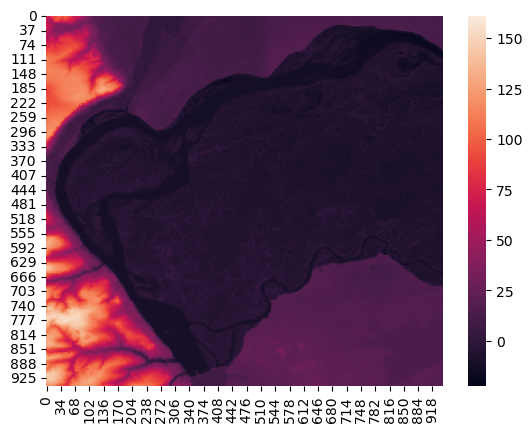

In [6]:
sns.heatmap(eta)

In [ ]:
rusla = ReadFile("Data/eriki.grd")

In [3]:
VAP35 = ReadFile("Data/VAP_35.grd")

настроить карту 

# Задание 1

Карты затопления от синего, карты от зеленого, карта затопления (накладывать карту на одну)

In [4]:
import matplotlib.colors as mcolors

In [ ]:
RdYlGn mcolors.ListedColormap(['b', 'b', 'y', 'r', 'maroon'])

In [4]:
l = ['#619bcc', '#5b97ca',
'#5593c8',
'#4f8fc6',
'#488bc4',
'#4288c2',
'#3d84bf',
'#397bb3',
'#3777ac',
'#3573a6',
'#336ea0',
'#316a9a',
'#2f6694',
'#2d618e',
'#2b5d87',
'#295981',
'#27557b',
'#255075',
'#234c6f',
'#214868',
'#1f4462',
'#1d3f5c',
'#1b3b56',
'#193750',
'#17334a',
'#152e43',
'#132a3d',
'#112637',
'#0f2231',
'#0d1d2b',
'#0b1925',
'#09151e']

In [37]:
Road[676, 198]

1.0

In [38]:
def zatoplenia(relief, H):
    a = plt.pcolormesh(relief, cmap='RdYlGn')
    b = plt.pcolormesh(np.where(H != 0, H, np.nan), cmap=mcolors.ListedColormap(l))
    plt.colorbar(a)
    plt.colorbar(b)

Карты затопления от синего, карты от зеленого, карта затопления (накладывать карту на одну)


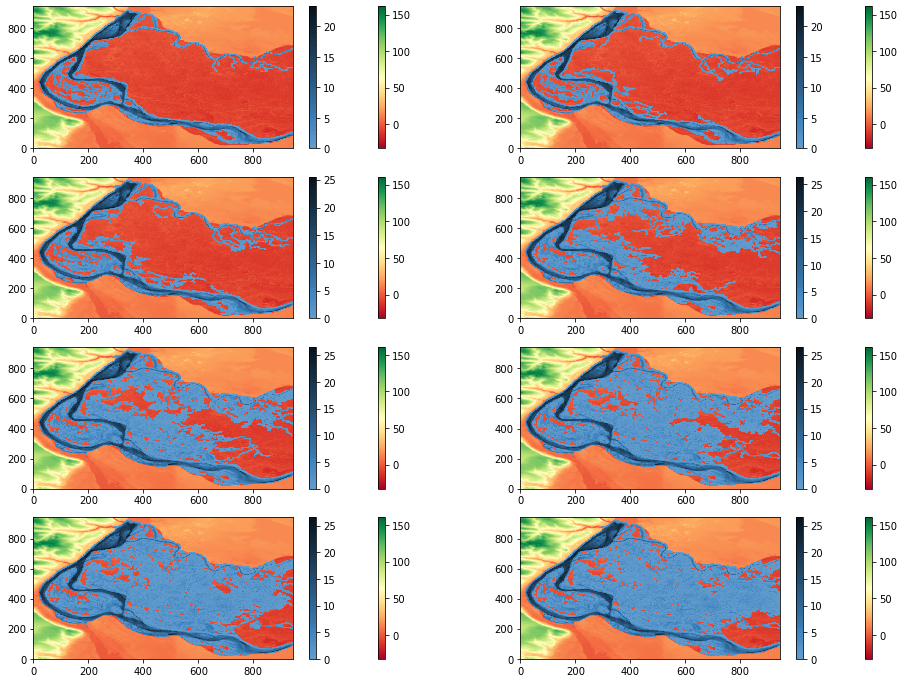

In [51]:
fig, ax = plt.subplots(4, 2, figsize=(16, 12))
axs = [ax[i, j] for i in range(4) for j in range(2)]
h = [H0, H1, H2, H3, H4, H5, H6, H7]
for i in range(0, 8):
    a = axs[i].pcolormesh(relief, cmap='RdYlGn')
    b = axs[i].pcolormesh(np.where(h[i] != 0, h[i], np.nan), cmap=mcolors.ListedColormap(l))
    fig.colorbar(a, ax=axs[i])
    fig.colorbar(b, ax=axs[i])

Road[676, 198]

In [41]:
Road[676, 198]

1.0

In [31]:
brown = ['#813a00',
'#884000',
'#8f4500',
'#964b00',
'#9d5107',
'#a4560f',
'#ab5c16',
'#964b00',
'#964b00',
'#ac6730',
'#c08457',
'#d3a27f',
'#e4c0a8',
'#f2dfd3']

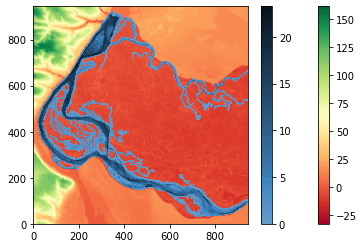

In [39]:
zatoplenia(relief, H1)

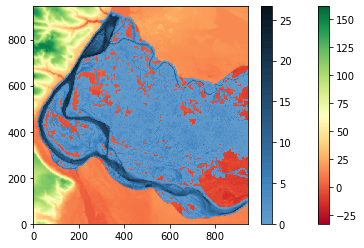

In [36]:
a = plt.pcolormesh(relief, cmap='RdYlGn')
b = plt.pcolormesh(np.where(H7 != 0, H7, np.nan), cmap=mcolors.ListedColormap(l))
plt.colorbar(a)
plt.colorbar(b)

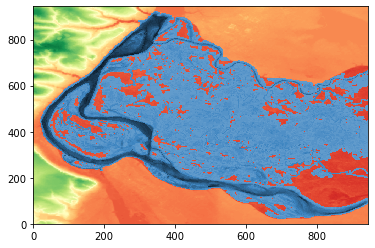

In [23]:
plt.pcolormesh(relief, cmap='RdYlGn')
plt.pcolormesh(np.where(H7 != 0, H7, np.nan), cmap=mcolors.ListedColormap(l))

<AxesSubplot:>

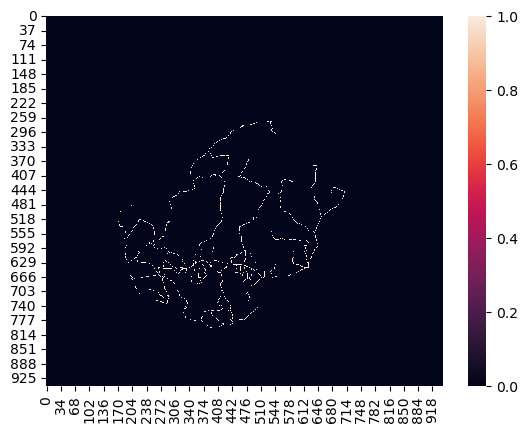

In [4]:
sns.heatmap(Road)

<AxesSubplot:>

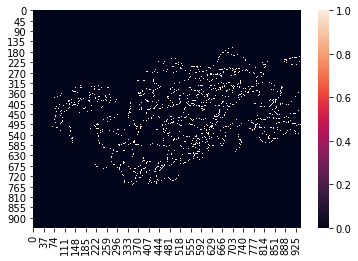

In [14]:
sns.heatmap(rusla)

# Задание 3

График зависимости затопленности (количество ячеек) русел территории от времени.

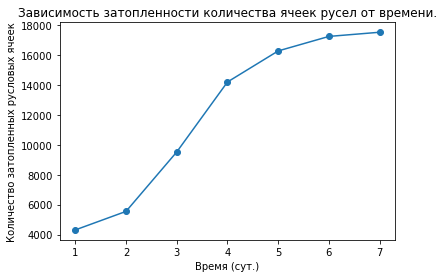

In [33]:
rusla_size = np.array([])
for i in [H1, H2, H3, H4, H5, H6, H7]:
    A = np.where(((rusla==1) & (i > 0.5)), rusla, -1)
    rusla_size = np.append(rusla_size, A[A != -1].size)
plt.plot(np.arange(1, 8), rusla_size)
plt.scatter(np.arange(1, 8), rusla_size)
plt.title('Зависимость затопленности количества ячеек русел от времени.');
plt.xlabel('Время (сут.)');
plt.ylabel('Количество затопленных русловых ячеек');

График зависимости затопленности (высота воды) русел территории от времени.

In [49]:
rusla_max_flooding = np.array([])
rusla_min_flooding = np.array([])
rusla_mean_flooding = np.array([])
for i in [H1, H2, H3, H4, H5, H6, H7]:
    A = np.where(((rusla==1) & (i > 0.5)), i, -500)
    j = A[A != -500]
    rusla_max_flooding = np.append(rusla_max_flooding, A[A != -500].max())
    rusla_min_flooding = np.append(rusla_min_flooding, A[A != -500].min())
    rusla_mean_flooding = np.append(rusla_mean_flooding, A[A != -500].mean())

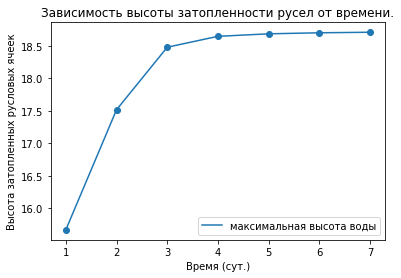

In [76]:
plt.plot(np.arange(1, 8), rusla_max_flooding, label='максимальная высота воды')
plt.scatter(np.arange(1, 8), rusla_max_flooding)
plt.title('Зависимость высоты затопленности русел от времени.');
plt.xlabel('Время (сут.)');
plt.ylabel('Высота затопленных русловых ячеек');
plt.legend()

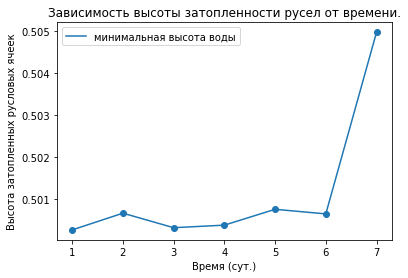

In [77]:
plt.plot(np.arange(1, 8), rusla_min_flooding, label='минимальная высота воды')
plt.scatter(np.arange(1, 8), rusla_min_flooding)
plt.title('Зависимость высоты затопленности русел от времени.');
plt.xlabel('Время (сут.)');
plt.ylabel('Высота затопленных русловых ячеек');
plt.legend()

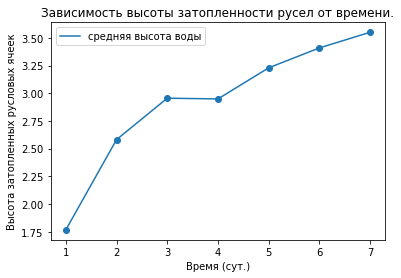

In [78]:
plt.plot(np.arange(1, 8), rusla_mean_flooding, label='средняя высота воды')
plt.scatter(np.arange(1, 8), rusla_mean_flooding)
plt.title('Зависимость высоты затопленности русел от времени.');
plt.xlabel('Время (сут.)');
plt.ylabel('Высота затопленных русловых ячеек');
plt.legend()

# Задание 4

Построить график зависимости количества затопленных дорог и среднего
значения высоты слоя воды на дорожных ячейках от времени.

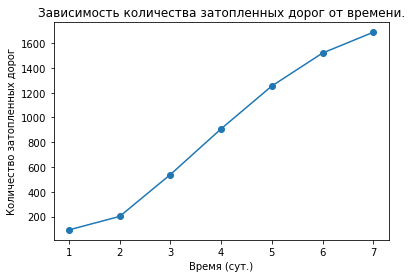

In [80]:
road_size = np.array([])
for i in [H1, H2, H3, H4, H5, H6, H7]:
    A = np.where(((rusla==0) & (Road==1) & (i > 0.5)), i, -1)
    road_size = np.append(road_size, A[A != -1].size)
plt.plot(np.arange(1, 8), road_size)
plt.scatter(np.arange(1, 8), road_size)
plt.title('Зависимость количества затопленных дорог от времени.');
plt.xlabel('Время (сут.)');
plt.ylabel('Количество затопленных дорог');

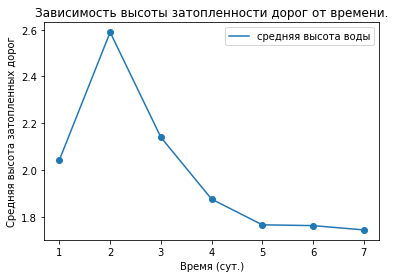

In [82]:
road_mean_flooding = np.array([])
for i in [H1, H2, H3, H4, H5, H6, H7]:
    A = np.where(((rusla==0) & (Road==1) & (i > 0.5)), i, -1)
    road_mean_flooding = np.append(road_mean_flooding, A[A != -1].mean())
plt.plot(np.arange(1, 8), road_mean_flooding, label='средняя высота воды')
plt.scatter(np.arange(1, 8), road_mean_flooding)
plt.title('Зависимость высоты затопленности дорог от времени.');
plt.xlabel('Время (сут.)');
plt.ylabel('Средняя высота затопленных дорог');
plt.legend()

# Задание 5

Построить график зависимости относительной площади затопленной части
пойменной территории от времени. 

In [94]:
VAP35 = VAP35[:871, 76:920]

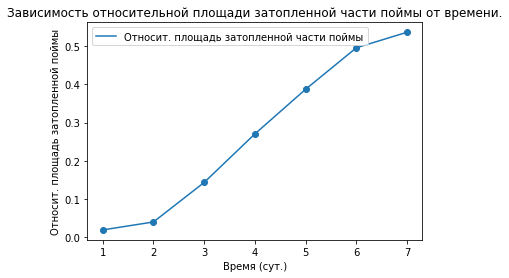

In [101]:
VAP_S = VAP35[VAP35 !=0 ].size * 2500
VAP_size = np.array([])
for i in [H1, H2, H3, H4, H5, H6, H7]:
    A = np.where(((VAP35 != 0) & (i[:871, 76:920] > 0.5)), VAP35, -100)
    VAP_size = np.append(VAP_size, A[A !=-100].size * 2500/VAP_S)
plt.plot(np.arange(1, 8), VAP_size, label='Относит. площадь затопленной части поймы')
plt.scatter(np.arange(1, 8), VAP_size)
plt.title('Зависимость относительной площади затопленной части поймы от времени.');
plt.xlabel('Время (сут.)');
plt.ylabel('Относит. площадь затопленной поймы');
plt.legend()

In [6]:
import re
import os
H = np.zeros((30, 944, 944))
i = 0
for filename in os.listdir("Data/raschet/"):
    if bool(re.search(r'^H_', filename)): 
        H[i]=ReadFile("Data/raschet/" + str(filename))
        i += 1
        continue
    else:
        continue

In [7]:
vx = np.zeros((30, 944, 944))
i = 0
for filename in os.listdir("Data/raschet/"):
    if bool(re.search(r'^vx_', filename)): 
        vx[i]=ReadFile("Data/raschet/" + str(filename))
        i += 1
        continue
    else:
        continue

In [8]:
vy = np.zeros((30, 944, 944))
i = 0
for filename in os.listdir("Data/raschet/"):
    if bool(re.search(r'^vy_', filename)): 
        vy[i]=ReadFile("Data/raschet/" + str(filename))
        i += 1
        continue
    else:
        continue

# Задание 2

Визуализировать карты течений. Данные для
данного вида рисунков – карты скоростей vx *.grd, vy *.grd.

Линии тока

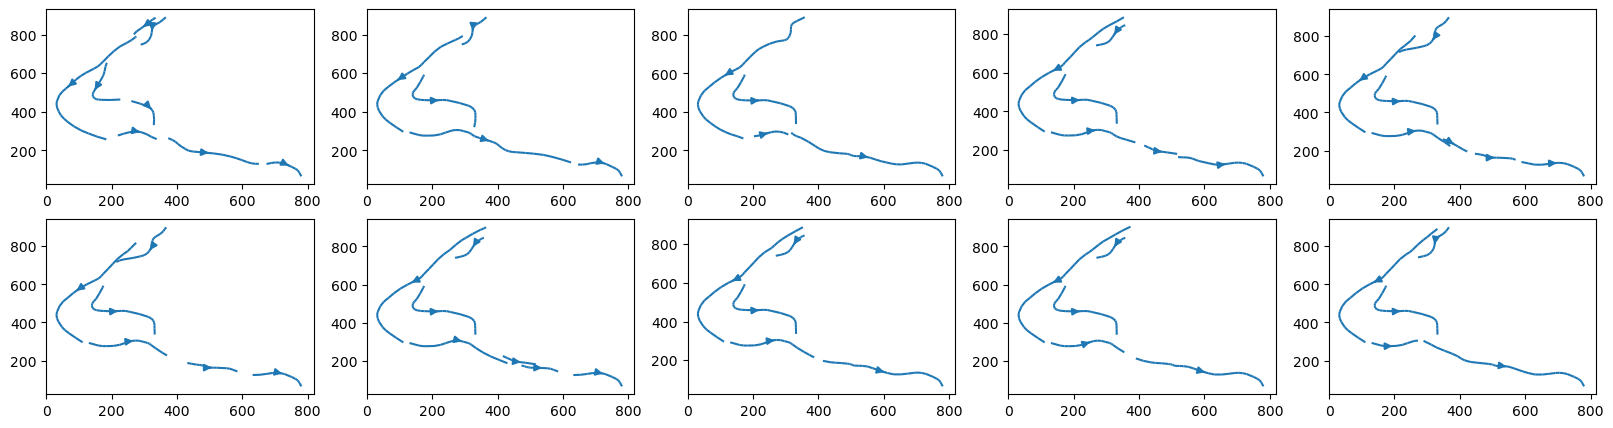

In [9]:
VX = [vx[i] for i in range(30)]
VY = [vy[i] for i in range(30)]
fig, ax = plt.subplots(2, 5, figsize=(20, 5))
axs = [ax[i, j] for i in range(2) for j in range(5)]
for i in range(0, 10):
        axs[i].streamplot(np.arange(0, 944), np.arange(0, 944), VX[i], VY[i])

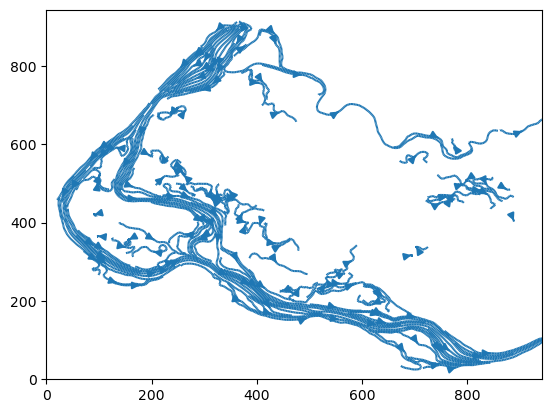

In [10]:
plt.streamplot(np.arange(0, 944), np.arange(0, 944), vx[15], vy[15], density=10)

# Задание 6

Построить график зависимости расходов в заданных точках (точки входа в
ВАП: А(718, 516), B(308, 369), C(784, 347) )

А(718, 516), B(308, 369), C(784, 347)

In [13]:
Hxy = [(H[i], vx[i], vy[i]) for i in range(29)]

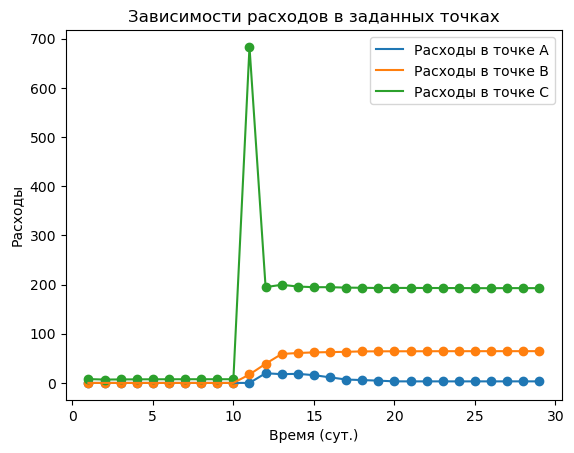

In [14]:
A, B, C = np.array([]), np.array([]), np.array([])
for i in Hxy:
    A = np.append(A, 50 * i[0][717, 515] * np.sqrt(i[1][717, 515]*i[1][717, 515] +i[2][717, 515]*i[2][717, 515]))
    B = np.append(B, 50 * i[0][307, 368] * np.sqrt(i[1][307, 368]*i[1][307, 368] +i[2][307, 368]*i[2][307, 368]))
    C = np.append(C, 50 * i[0][783, 346] * np.sqrt(i[1][783, 346]*i[1][783, 346] +i[2][783, 346]*i[2][783, 346]))
plt.plot(np.arange(1, 30), A, label="Расходы в точке A")
plt.scatter(np.arange(1, 30), A)
plt.plot(np.arange(1, 30), B, label="Расходы в точке B")
plt.scatter(np.arange(1, 30), B)
plt.plot(np.arange(1, 30), C, label="Расходы в точке C")
plt.scatter(np.arange(1, 30), C)
plt.title('Зависимости расходов в заданных точках');
plt.xlabel('Время (сут.)');
plt.ylabel('Расходы');
plt.legend()

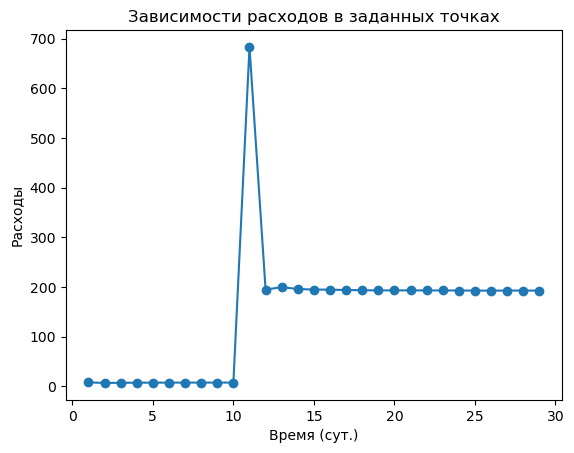

In [15]:
plt.plot(np.arange(1, 30), C)
plt.scatter(np.arange(1, 30), C)
plt.title('Зависимости расходов в заданных точках');
plt.xlabel('Время (сут.)');
plt.ylabel('Расходы');

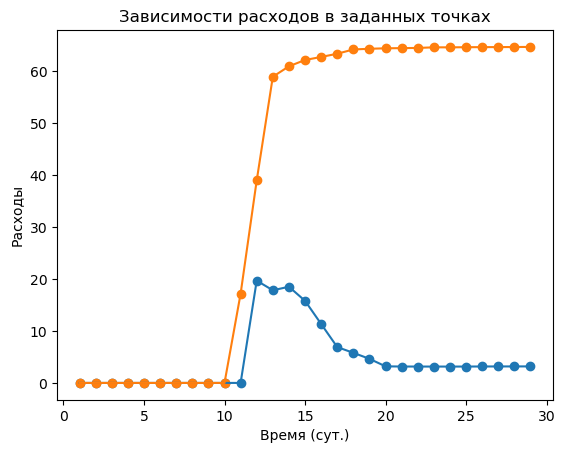

In [16]:
plt.plot(np.arange(1, 30), A)
plt.scatter(np.arange(1, 30), A)
plt.plot(np.arange(1, 30), B)
plt.scatter(np.arange(1, 30), B)
plt.title('Зависимости расходов в заданных точках');
plt.xlabel('Время (сут.)');
plt.ylabel('Расходы');